In [6]:
# 洗数据以提供给机器学习

import pandas as pd

# 读取CSV文件
df = pd.read_csv('log_2020_01.csv', nrows=1000000)

# 取前五百行
df = df.head(1000000)

# 删去不需要的列（假设你知道列名）
columns_to_keep = ['id', 'actor_id','actor_login',  'issue_author_type','repo_id', 'repo_name', 'created_at', 'create_description', 'pull_merged_by_type']  # 替换为你需要保留的列名
df = df[columns_to_keep]

# 保存为新的CSV文件
df.to_csv('Washed2.csv', index=False)

C:\Users\23162\AppData\Local\Temp\ipykernel_12784\1373452781.py:6: DtypeWarning: Columns (8,12,13,19,23,35,42,45,48,51,55,61,62,70,73,81,82,87,89,91,92,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('log_2020_01.csv', nrows=1000000)


C:\Users\23162\AppData\Local\Temp\ipykernel_12784\1926726367.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1')


created_date_counts.csv
forecasted_created_date_counts.csv


c:\Users\23162\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\23162\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\23162\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\23162\AppData\Local\Programs\Python\Python311\Lib

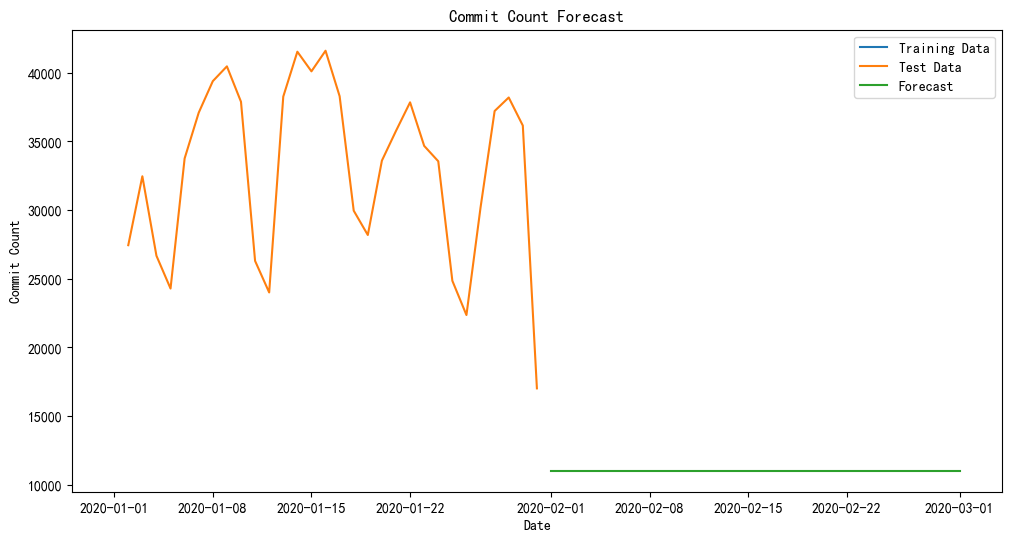

In [10]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'Washed2.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# 确保数据没有缺失值
df = df.dropna(subset=['created_at', 'repo_id', 'repo_name'])

# 提取created_at中的日期部分并统计频率，生成CSV表格
df['created_date'] = pd.to_datetime(df['created_at']).dt.date
date_counts = df['created_date'].value_counts().reset_index()
date_counts.columns = ['created_date', 'count']
date_counts = date_counts.sort_values('created_date')

# 保存统计频率的CSV表格
date_counts.to_csv('created_date_counts.csv', index=False)
print("created_date_counts.csv")

# 设置时间序列数据
date_counts.set_index('created_date', inplace=True)

# 拆分训练集和测试集
train_data = date_counts.iloc[:-30]
test_data = date_counts.iloc[-30:]

# 确保时间序列的稳定性
train_data_diff = train_data.diff().dropna()

# 定义并训练ARIMA模型
# 调整ARIMA模型的阶数
model = ARIMA(train_data_diff, order=(2, 1, 0))  # 降低模型阶数
model_fit = model.fit()

# 预测
forecast_diff = model_fit.forecast(steps=30)
forecast = train_data['count'].iloc[-1] + forecast_diff.cumsum()

# 创建预测结果的DataFrame
forecast_index = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_df = pd.DataFrame(forecast.values, index=forecast_index, columns=['forecast'])
forecast_df = forecast_df.reset_index()
forecast_df.columns = ['created_date', 'forecast']

# 保存预测结果到CSV文件
forecast_df.to_csv('forecasted_created_date_counts.csv', index=False)
print("forecasted_created_date_counts.csv")

# 绘制结果
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['count'], label='Training Data')
plt.plot(test_data.index, test_data['count'], label='Test Data')
plt.plot(forecast_df['created_date'], forecast_df['forecast'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Commit Count')
plt.title('Commit Count Forecast')
plt.legend()
plt.show()


In [1]:
# 重新进行大规模统计（100 0000行）

import pandas as pd

# 读取CSV文件
df = pd.read_csv('log_2020_01.csv' ,nrows = 1000000)

# 取前五百行
df = df.head(1000000)

# 删去不需要的列（假设你知道列名）
columns_to_keep = ['id','type', 'actor_id','actor_login',  'issue_author_type','repo_id', 'repo_name', 'created_at', 'create_description', 'pull_merged_by_type', 'repo_language']  # 替换为你需要保留的列名
df = df[columns_to_keep]

# 保存为新的CSV文件
df.to_csv('Washed1.csv', index=False)

C:\Users\23162\AppData\Local\Temp\ipykernel_12784\2542890809.py:6: DtypeWarning: Columns (8,12,13,19,23,35,42,45,48,51,55,61,62,70,73,81,82,87,89,91,92,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('log_2020_01.csv' ,nrows = 1000000)


In [2]:
import pandas as pd

# 读取CSV文件
file_path = 'Washed1.csv'
df = pd.read_csv(file_path)

# 统计repo_id的出现次数并生成CSV表格
repo_id_counts = df['repo_id'].value_counts().reset_index()
repo_id_counts.columns = ['repo_id', 'count']
result = pd.merge(repo_id_counts, df[['repo_id', 'repo_name']].drop_duplicates(), on='repo_id')
result.to_csv('repo_id_counts.csv', index=False)
print("Repo ID counts saved to repo_id_counts.csv")

# 提取created_at中的日期部分并统计频率，生成CSV表格
df['created_date'] = pd.to_datetime(df['created_at']).dt.date
date_counts = df['created_date'].value_counts().reset_index()
date_counts.columns = ['created_date', 'count']
date_counts.to_csv('created_date_counts.csv', index=False)
print("Created date counts saved to created_date_counts.csv")


C:\Users\23162\AppData\Local\Temp\ipykernel_12784\153491972.py:5: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Repo ID counts saved to repo_id_counts.csv
Created date counts saved to created_date_counts.csv


In [3]:
import pandas as pd

# 读取CSV文件
file_path = 'Washed1.csv' 
df = pd.read_csv(file_path)

# 统计repo_language的出现次数
language_counts = df['repo_language'].value_counts().reset_index()
language_counts.columns = ['repo_language', 'count']

# 保存为新的CSV文件
language_counts.to_csv('repo_language_counts.csv', index=False)

print("Repo language counts saved to repo_language_counts.csv")

Repo language counts saved to repo_language_counts.csv


C:\Users\23162\AppData\Local\Temp\ipykernel_12784\3471448851.py:5: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
